In [1]:
import pandas as pd

# Load the data
df = pd.read_csv("owid-covid-data.csv")

# Check the shape and columns
print(f"Dataset shape: {df.shape}")
print(df.columns)

# Preview the first few rows
df.head()


Dataset shape: (91026, 59)
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [2]:
df.isnull().sum().sort_values(ascending=False).head(20)

weekly_icu_admissions                    90196
weekly_icu_admissions_per_million        90196
weekly_hosp_admissions                   89580
weekly_hosp_admissions_per_million       89580
people_fully_vaccinated_per_hundred      82259
people_fully_vaccinated                  82259
icu_patients                             81850
icu_patients_per_million                 81850
new_vaccinations                         80842
people_vaccinated                        79673
people_vaccinated_per_hundred            79673
hosp_patients                            79611
hosp_patients_per_million                79611
total_vaccinations                       78920
total_vaccinations_per_hundred           78920
new_vaccinations_smoothed                70489
new_vaccinations_smoothed_per_million    70489
total_tests_per_thousand                 50153
total_tests                              50153
new_tests                                49840
dtype: int64

In [4]:
# Make an explicit copy to avoid chained assignment issues
df_countries = df[df['location'].isin(countries)].copy()

# Convert 'date' to datetime safely
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Fill missing values safely using .loc
cols_to_fill = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
df_countries.loc[:, cols_to_fill] = df_countries[cols_to_fill].fillna(0)


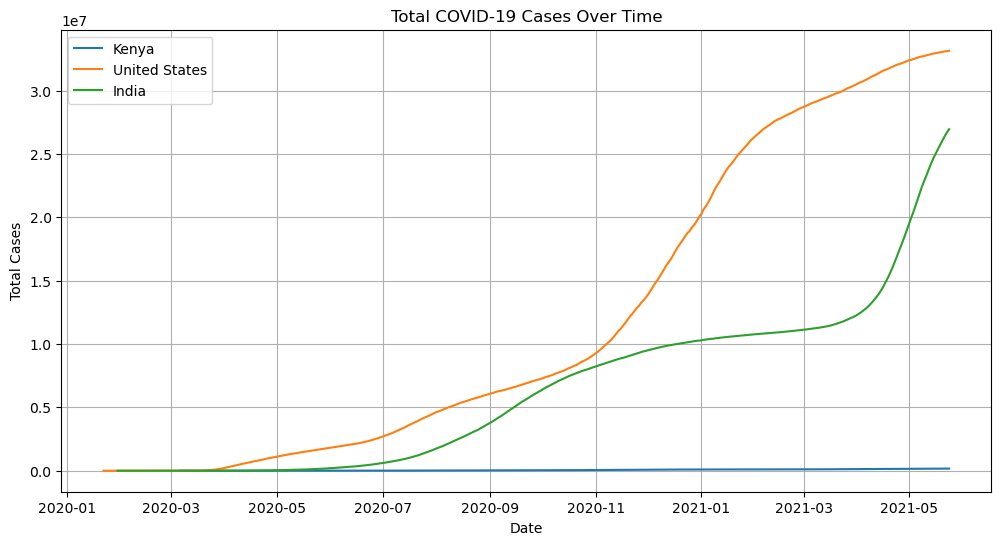

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot total cases over time
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.grid(True)
plt.show()

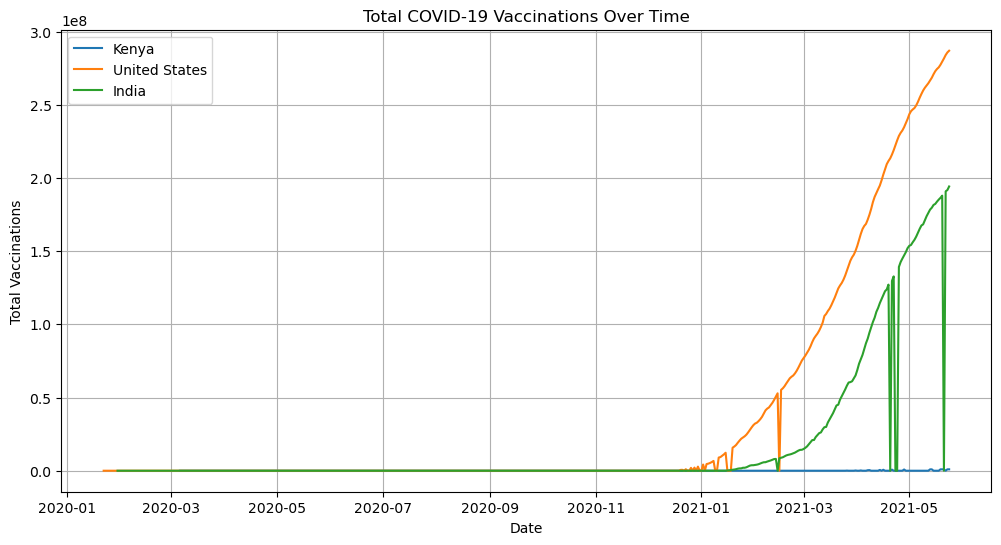

In [6]:
plt.figure(figsize=(12, 6))

for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title("Total COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [9]:
import ipywidgets as widgets
from IPython.display import display

# Create dropdowns and date sliders
country_dropdown = widgets.Dropdown(options=df['location'].unique(), description='Country:')
start_date = widgets.DatePicker(description='Start Date')
end_date = widgets.DatePicker(description='End Date')

display(country_dropdown, start_date, end_date)

# Filter based on widget input
def filter_data(country, start, end):
    filtered = df[(df['location'] == country) & 
                  (df['date'] >= pd.to_datetime(start)) & 
                  (df['date'] <= pd.to_datetime(end))]
    return filtered

Dropdown(description='Country:', options=('Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola', …

DatePicker(value=None, description='Start Date', step=1)

DatePicker(value=None, description='End Date', step=1)

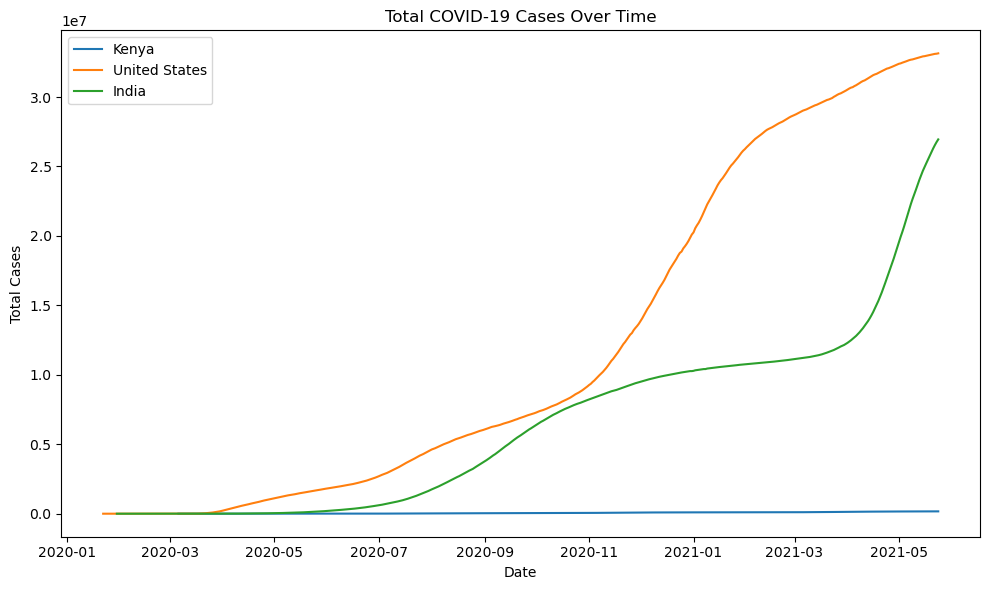

In [13]:
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()


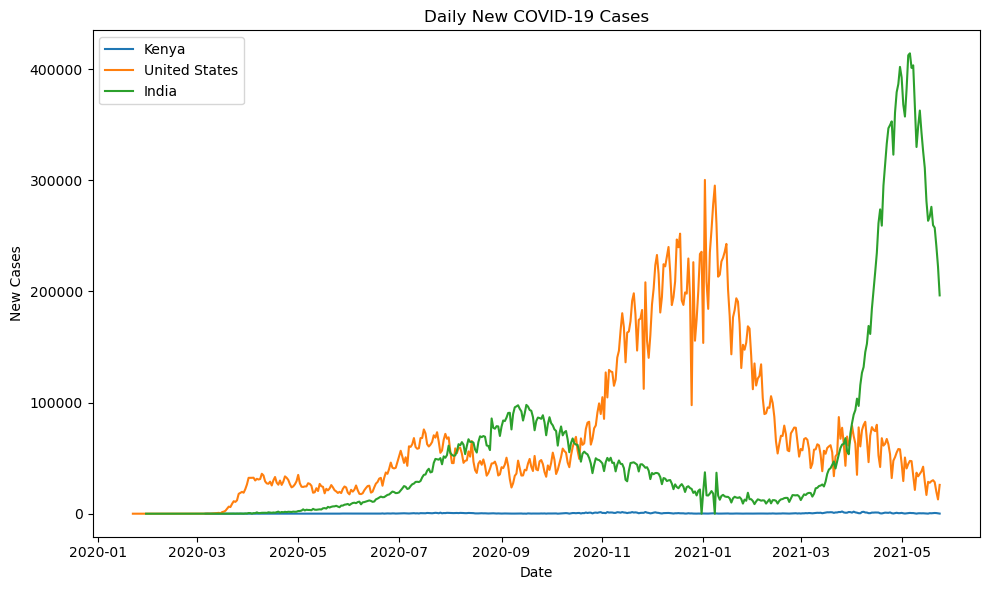

In [14]:
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


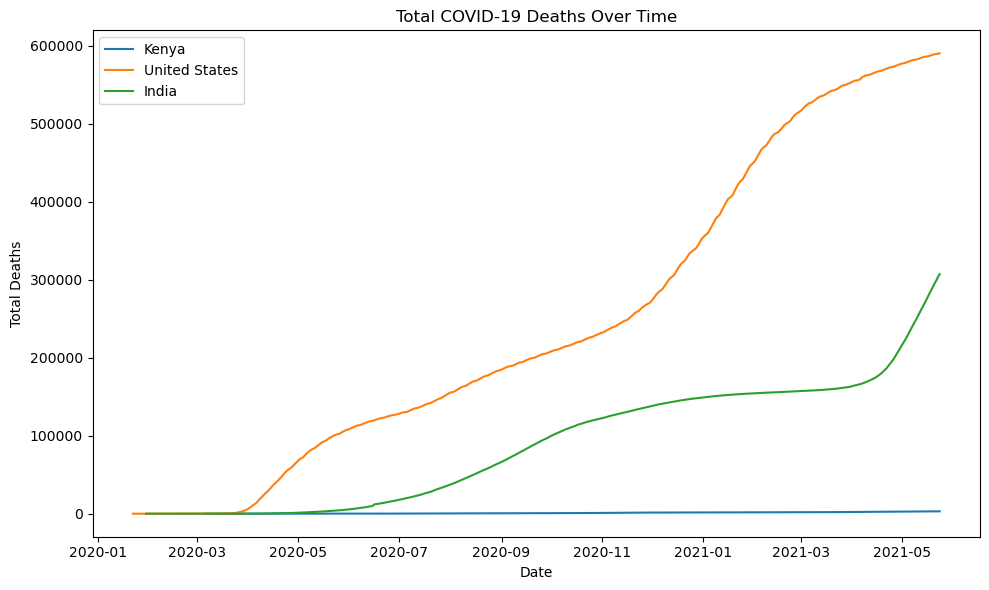

In [15]:
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.tight_layout()
plt.show()


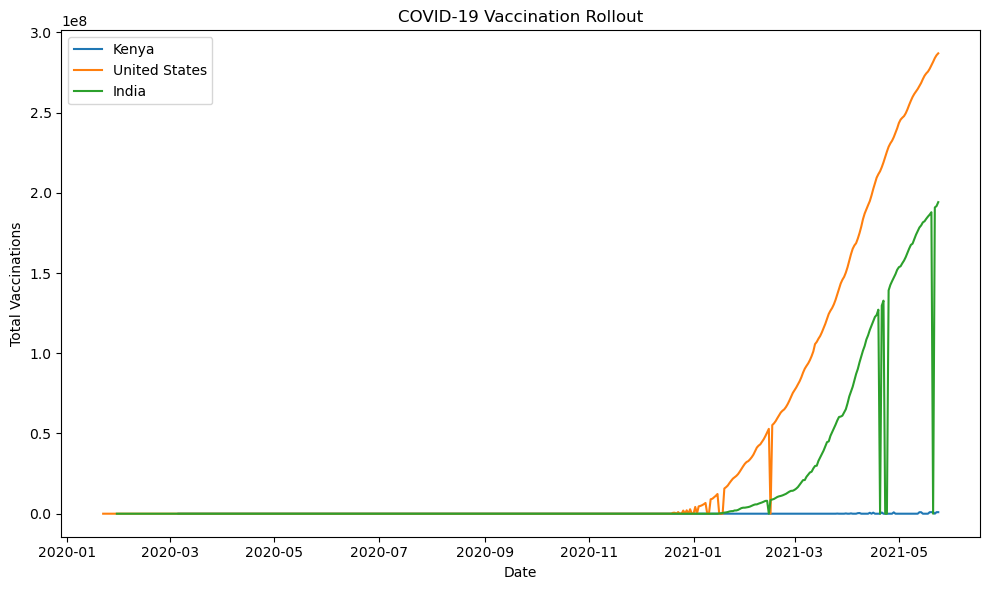

In [16]:
plt.figure(figsize=(10,6))
for country in countries:
    subset = df_countries[df_countries['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('COVID-19 Vaccination Rollout')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
# Add death rate and vaccination coverage
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']
df_countries['vaccination_rate'] = df_countries['total_vaccinations'] / df_countries['population']


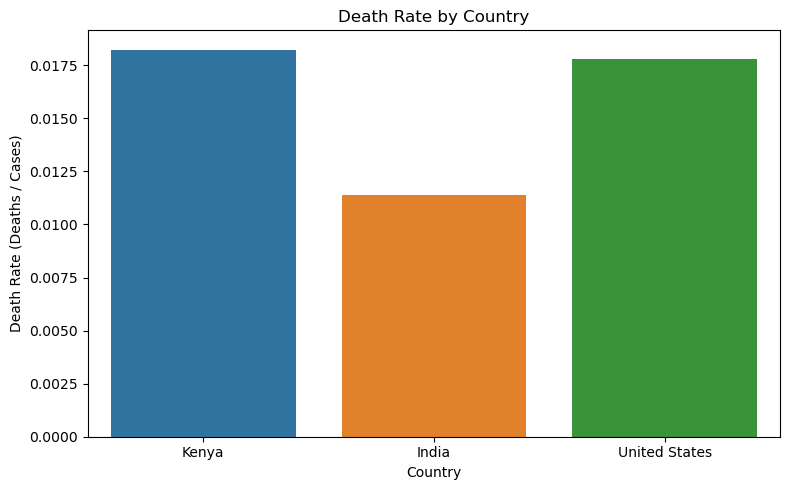

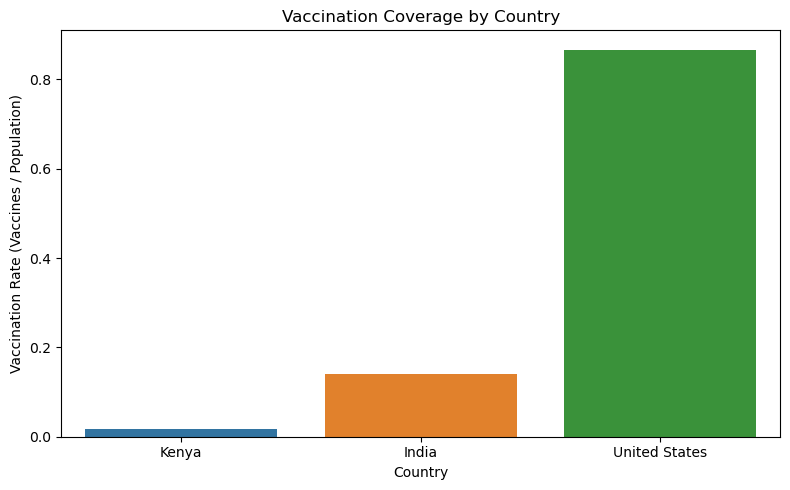

In [18]:
# Get latest data per country
latest = df_countries.sort_values('date').groupby('location').tail(1)

# Bar chart for death rate
plt.figure(figsize=(8,5))
sns.barplot(data=latest, x='location', y='death_rate')
plt.title('Death Rate by Country')
plt.ylabel('Death Rate (Deaths / Cases)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

# Bar chart for vaccination rate
plt.figure(figsize=(8,5))
sns.barplot(data=latest, x='location', y='vaccination_rate')
plt.title('Vaccination Coverage by Country')
plt.ylabel('Vaccination Rate (Vaccines / Population)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()